# Airline passenger satisfaction  project

Data Loading

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'C:\Users\Vishnu\Downloads\airline_passenger_satisfaction_data.csv')

# Quick inspection
print("Shape of dataset:", df.shape)
print("First few rows:\n", df.head())
print("Column data types:\n", df.dtypes)


Shape of dataset: (129880, 24)
First few rows:
    ID  Gender  Age Customer Type Type of Travel     Class  Flight Distance  \
0   1    Male   48    First-time       Business  Business              821   
1   2  Female   35     Returning       Business  Business              821   
2   3    Male   41     Returning       Business  Business              853   
3   4    Male   50     Returning       Business  Business             1905   
4   5  Female   49     Returning       Business  Business             3470   

   Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
0                2            5.0                                       3   
1               26           39.0                                       2   
2                0            0.0                                       4   
3                0            0.0                                       2   
4                0            1.0                                       3   

   ...  On-board Ser

Data Cleaning

In [6]:
# Checking missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Example strategy: Filling 'Arrival Delay' missing values with median
df['Arrival Delay'].fillna(df['Arrival Delay'].median(), inplace=True)


Missing values:
 ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Enterta

In [7]:
df.drop(columns=['ID'], inplace=True)

In [8]:
df.drop_duplicates(inplace=True)
print("Shape after removing duplicates:", df.shape)

Shape after removing duplicates: (129880, 23)


In [9]:
df['Arrival Delay'] = df['Arrival Delay'].astype(float)  # Convert to float if needed


In [10]:
df

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,Male,48,First-time,Business,Business,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,Female,35,Returning,Business,Business,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,Male,41,Returning,Business,Business,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,Male,50,Returning,Business,Business,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,Female,49,Returning,Business,Business,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,3,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,2,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,4,...,4,4,5,3,3,4,5,3,5,Satisfied


In [11]:
df.isnull().sum()

Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                          0
Satisfaction                    

# Exploratory Data Analysis (EDA)

In [13]:
#Summary Statistics

In [14]:
print("Summary statistics for numerical columns:\n", df.describe())
print("Summary statistics for categorical columns:\n", df.describe(include=['object']))


Summary statistics for numerical columns:
                  Age  Flight Distance  Departure Delay  Arrival Delay  \
count  129880.000000    129880.000000    129880.000000  129880.000000   
mean       39.427957      1190.316392        14.713713      15.045465   
std        15.119360       997.452477        38.071126      38.416353   
min         7.000000        31.000000         0.000000       0.000000   
25%        27.000000       414.000000         0.000000       0.000000   
50%        40.000000       844.000000         0.000000       0.000000   
75%        51.000000      1744.000000        12.000000      13.000000   
max        85.000000      4983.000000      1592.000000    1584.000000   

       Departure and Arrival Time Convenience  Ease of Online Booking  \
count                           129880.000000           129880.000000   
mean                                 3.057599                2.756876   
std                                  1.526741                1.401740   
min    

In [15]:
#Univariate Analysis

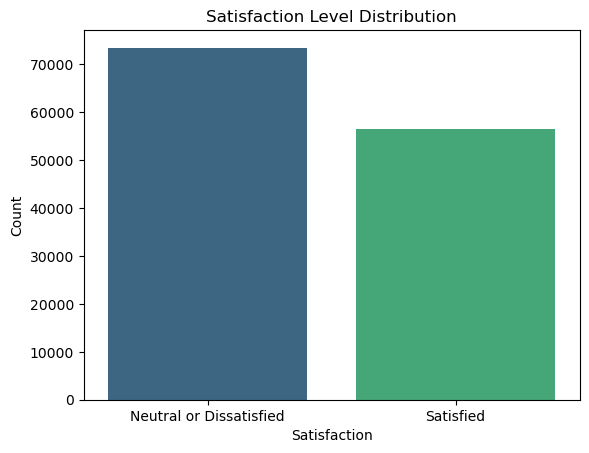

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Satisfaction distribution
sns.countplot(data=df, x='Satisfaction', palette='viridis')
plt.title("Satisfaction Level Distribution")
plt.xlabel("Satisfaction")
plt.ylabel("Count")
plt.show()


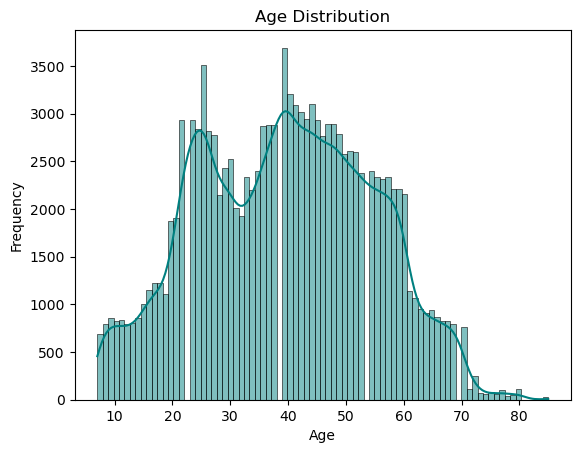

In [17]:
#Age Distribution
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
sns.histplot(df['Age'], kde=True, color='teal')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


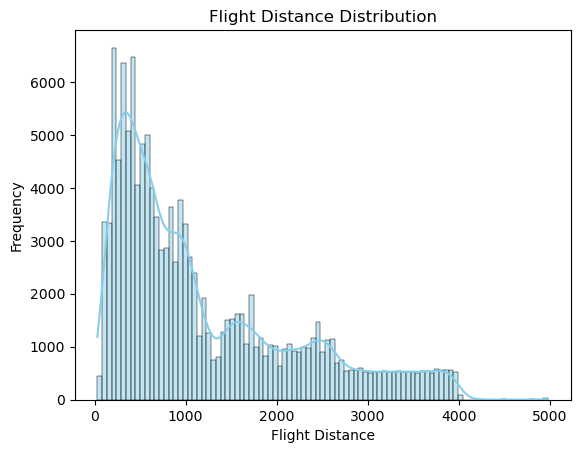

In [18]:
#Flight Distance Distribution
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

sns.histplot(df['Flight Distance'], kde=True, color='skyblue')
plt.title("Flight Distance Distribution")
plt.xlabel("Flight Distance")
plt.ylabel("Frequency")
plt.show()


In [19]:
#Bivariate Analysis

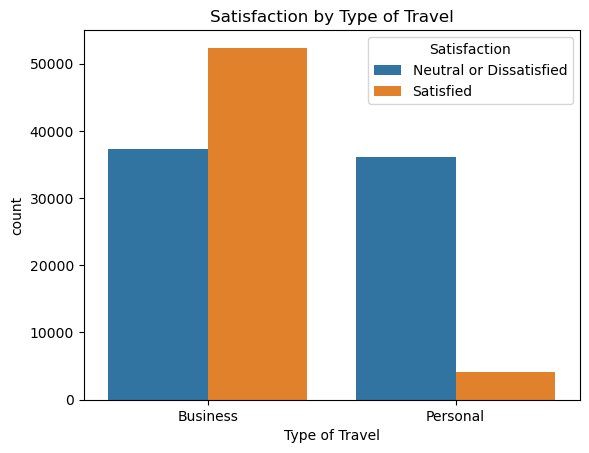

In [20]:
# Satisfaction by Type of Travel


sns.countplot(data=df, x='Type of Travel', hue='Satisfaction')
plt.title("Satisfaction by Type of Travel")
plt.show()


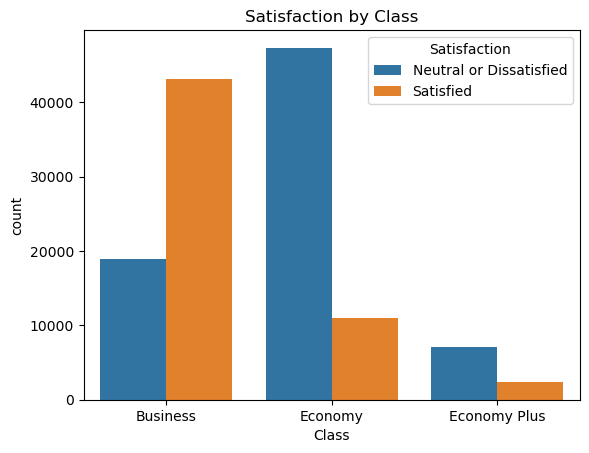

In [21]:
#Satisfaction by Class

sns.countplot(data=df, x='Class', hue='Satisfaction')
plt.title("Satisfaction by Class")
plt.show()


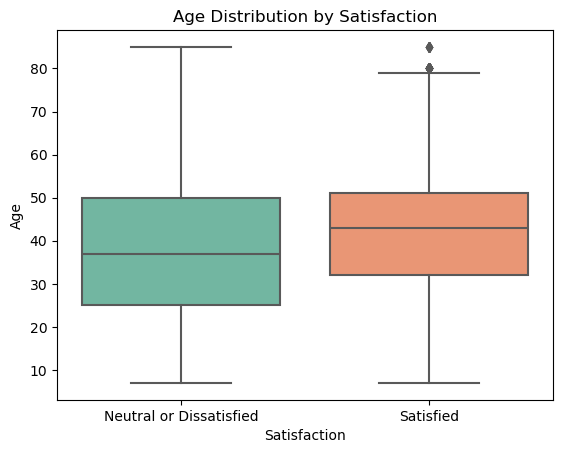

In [22]:
#Boxplot of Age by Satisfaction   

sns.boxplot(data=df, x='Satisfaction', y='Age', palette='Set2')
plt.title("Age Distribution by Satisfaction")
plt.show()


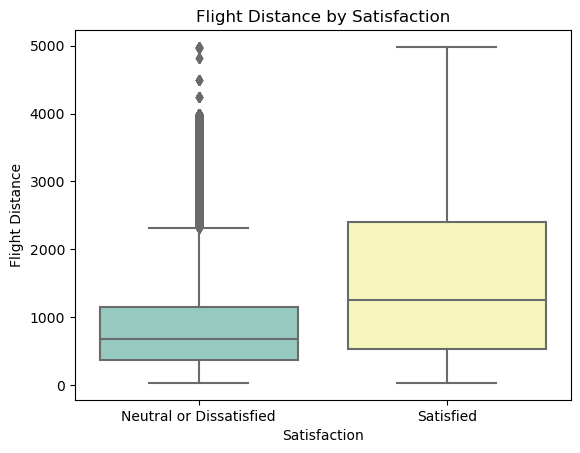

In [23]:
#Flight Distance by Satisfaction    

sns.boxplot(data=df, x='Satisfaction', y='Flight Distance', palette='Set3')
plt.title("Flight Distance by Satisfaction")
plt.show()


Data Visualization

In [25]:
#Correlation Heatmap

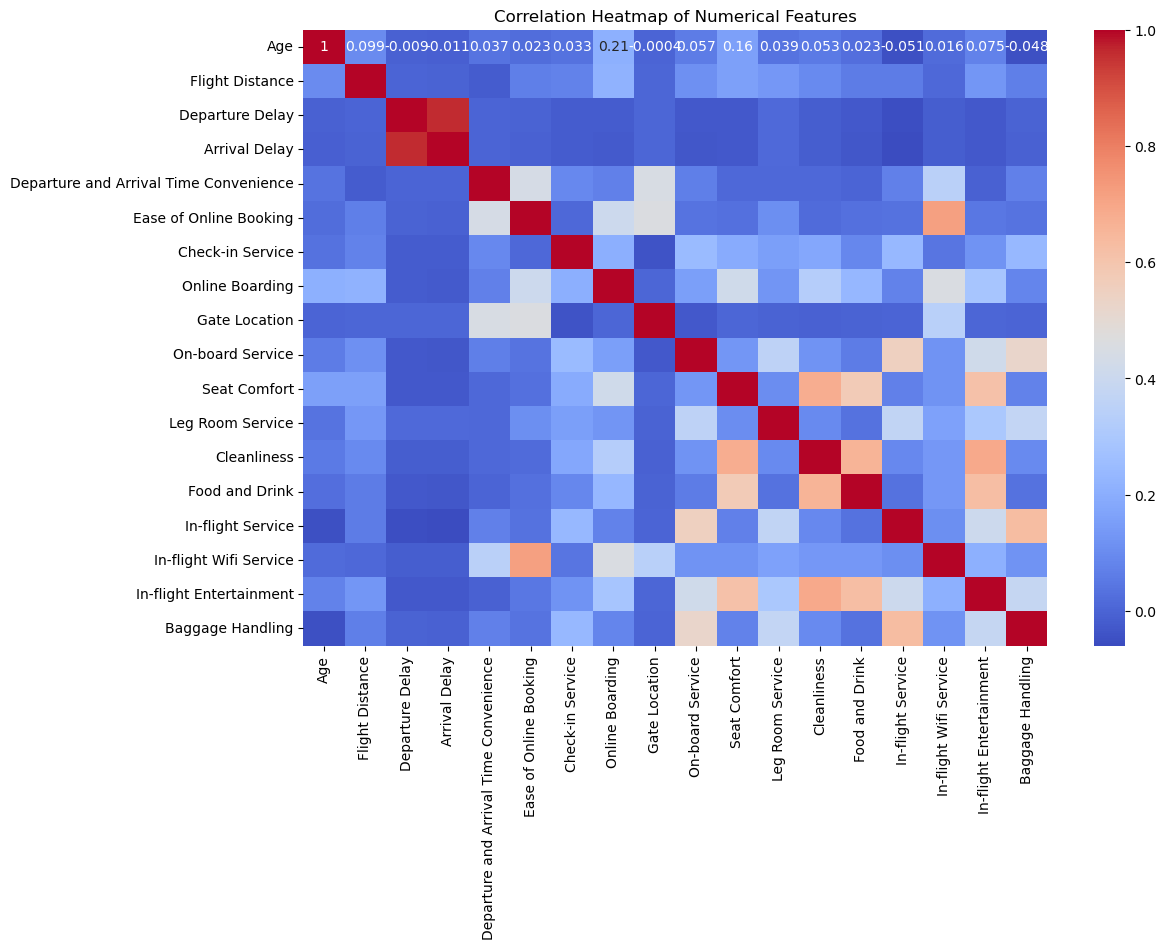

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the numerical columns for correlation
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


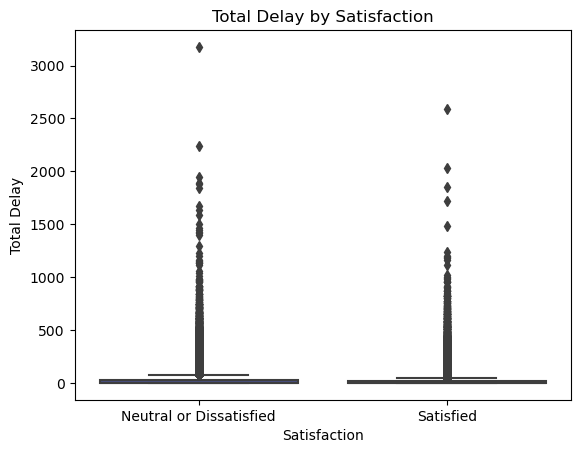

In [27]:
#Total Delay vs. Satisfaction

# Create Total Delay feature for this plot
df['Total Delay'] = df['Departure Delay'] + df['Arrival Delay']

sns.boxplot(data=df, x='Satisfaction', y='Total Delay', palette='mako')
plt.title("Total Delay by Satisfaction")
plt.show()


In [28]:
#Feature Interactions

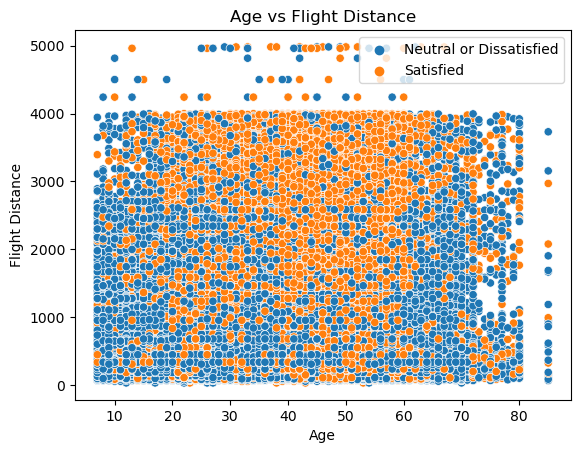

In [29]:
sns.scatterplot(data=df, x='Age', y='Flight Distance', hue='Satisfaction')
plt.title("Age vs Flight Distance")
plt.legend(loc='upper right') 
plt.show()


# Feature Engineering

In [31]:
#Encoding Categorical Variables

In [32]:
# One-hot encode with get_dummies
df_encoded = pd.get_dummies(df, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class'], drop_first=True)


In [33]:
#Creating New Features

In [34]:
# Total Delay
df['Total Delay'] = df['Departure Delay'] + df['Arrival Delay']

# Binary Satisfaction Encoding
df['Satisfaction Binary'] = df['Satisfaction'].apply(lambda x: 1 if x == 'Satisfied' else 0)


In [35]:
#Scaling Numerical Features

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay', 'Total Delay']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


Data exporting

In [38]:
# Define the path for saving the new file
output_path = r'C:\Users\Vishnu\Downloads\airline_passenger_satisfaction_cleaned_data.csv'

# Export the cleaned and feature-engineered dataset to CSV
df_encoded.to_csv(output_path, index=False)

print(f"Cleaned data saved to: {output_path}")


Cleaned data saved to: C:\Users\Vishnu\Downloads\airline_passenger_satisfaction_cleaned_data.csv


#  Machine Learning Forecasting Techniques

In [40]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd


airline_data = df

# Redoing the preprocessing and model setup

# Step 1: Handle missing values and encode categorical variables

# Drop rows with missing values in 'Arrival Delay' column
airline_data.dropna(subset=['Arrival Delay'], inplace=True)

# Encode categorical variables
label_enc = LabelEncoder()
airline_data['Gender'] = label_enc.fit_transform(airline_data['Gender'])
airline_data['Customer Type'] = label_enc.fit_transform(airline_data['Customer Type'])
airline_data['Type of Travel'] = label_enc.fit_transform(airline_data['Type of Travel'])
airline_data['Class'] = label_enc.fit_transform(airline_data['Class'])
airline_data['Satisfaction'] = label_enc.fit_transform(airline_data['Satisfaction'])

# Define features (X) and target (y)
X = airline_data.drop(columns=['Satisfaction'])
y = airline_data['Satisfaction']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train and evaluate models
results = {}

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
results['Logistic Regression'] = accuracy_score(y_test, y_pred_logreg)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
results['Decision Tree'] = accuracy_score(y_test, y_pred_dt)

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
results['K-Nearest Neighbors'] = accuracy_score(y_test, y_pred_knn)

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
results['Naive Bayes'] = accuracy_score(y_test, y_pred_nb)

# Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
results['Support Vector Machine'] = accuracy_score(y_test, y_pred_svm)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
results['Random Forest'] = accuracy_score(y_test, y_pred_rf)

# Display the accuracy of each model
results


{'Logistic Regression': 1.0,
 'Decision Tree': 1.0,
 'K-Nearest Neighbors': 0.9628888204496459,
 'Naive Bayes': 1.0,
 'Support Vector Machine': 0.9998973411354071,
 'Random Forest': 1.0}

   Machine Learning Model    Accuracy
0     Logistic Regression  100.000000
1           Decision Tree  100.000000
2     K-Nearest Neighbors   96.288882
3             Naive Bayes  100.000000
4  Support Vector Machine   99.989734
5           Random Forest  100.000000


<Axes: xlabel='Accuracy', ylabel='Machine Learning Model'>

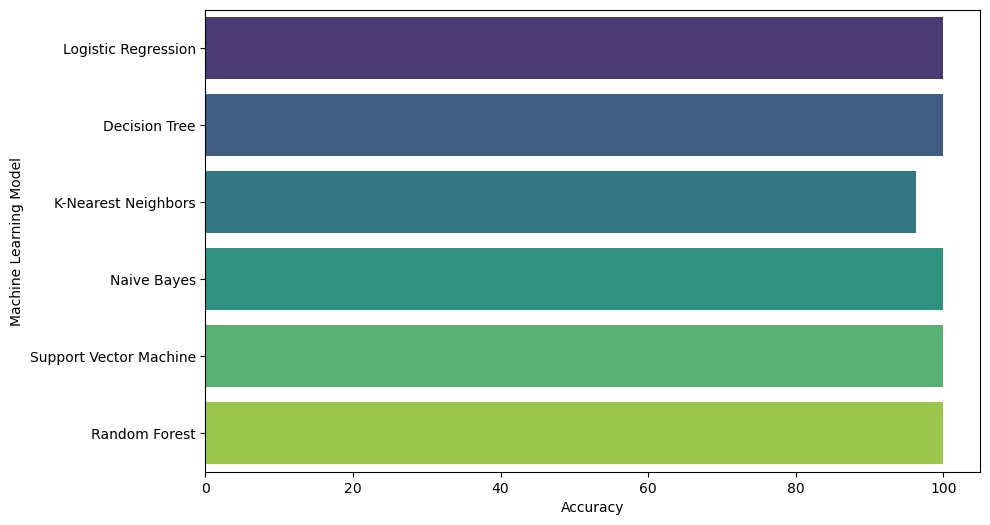

In [41]:
#Create a results table
results_df = pd.DataFrame(list(results.items()), columns=['Machine Learning Model', 'Accuracy'])
results_df['Accuracy'] = results_df['Accuracy'] * 100  # Convert accuracy to percentage

print(results_df)

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Accuracy',
    y='Machine Learning Model',
    data=results_df,
    palette='viridis',
    orient='h'
)



In [42]:
# Sample input data for prediction
sample_data = {
    'Gender': [0],  # 0 for male, 1 for female
    'Age': [30],  # Example age
    'Customer Type': [1],  # 1 for returning customer, 0 for new customer
    'Type of Travel': [0],  # 0 for Business, 1 for Personal
    'Class': [1],  # 0 for Economy, 1 for Business, 2 for First Class
    'Flight Distance': [1500],  # Flight distance in miles
    'Departure Delay': [10],  # Departure delay in minutes
    'Arrival Delay': [5],  # Arrival delay in minutes
    'Departure and Arrival Time Convenience': [4],  # Scale from 1 to 5
    'Ease of Online Booking': [5],  # Scale from 1 to 5
    'Check-in Service': [5],  # Scale from 1 to 5
    'Online Boarding': [5],  # Scale from 1 to 5
    'Gate Location': [4],  # Scale from 1 to 5
    'On-board Service': [5],  # Scale from 1 to 5
    'Seat Comfort': [4],  # Scale from 1 to 5
    'Leg Room Service': [3],  # Scale from 1 to 5
    'Cleanliness': [4],  # Scale from 1 to 5
    'Food and Drink': [4],  # Scale from 1 to 5
    'In-flight Service': [5],  # Scale from 1 to 5
    'In-flight Wifi Service': [4],  # Scale from 1 to 5
    'In-flight Entertainment': [5],  # Scale from 1 to 5
    'Baggage Handling': [5],  # Scale from 1 to 5
    'Total Delay': [15],  # Total delay in minutes
    'Satisfaction Binary': [1]  # Placeholder value for prediction (make sure this matches the classes of your target variable)
}

sample_df = pd.DataFrame(sample_data)

# Predict using each model
logreg_pred = logreg.predict(sample_df)
print(f"Logistic Regression Prediction: {logreg_pred[0]}")  # Predicts 0 (dissatisfied) or 1 (satisfied)

dt_pred = dt.predict(sample_df)
print(f"Decision Tree Prediction: {dt_pred[0]}")  # Decision tree prediction result

knn_pred = knn.predict(sample_df)
print(f"K-Nearest Neighbors Prediction: {knn_pred[0]}")  # KNN model prediction (0 or 1)

nb_pred = nb.predict(sample_df)
print(f"Naive Bayes Prediction: {nb_pred[0]}")  # Naive Bayes prediction (0 or 1)

svm_pred = svm.predict(sample_df)
print(f"Support Vector Machine Prediction: {svm_pred[0]}")  # SVM model prediction (0 or 1)

rf_pred = rf.predict(sample_df)
print(f"Random Forest Prediction: {rf_pred[0]}")  # Random Forest prediction (0 or 1)


Logistic Regression Prediction: 1
Decision Tree Prediction: 1
K-Nearest Neighbors Prediction: 1
Naive Bayes Prediction: 1
Support Vector Machine Prediction: 1
Random Forest Prediction: 1


# Conclusion:
Logistic Regression, Decision Tree, Naive Bayes, and Random Forest achieved 100% accuracy, making them the best models for this task.

Support Vector Machine performed nearly as well with 99.99% accuracy.

K-Nearest Neighbors showed slightly lower performance at 96.29% accuracy but is still a good option.